In [64]:
import pandas_datareader as pdr
from api_key import TIINGO_API_KEY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('AAPL.csv')
df = df.drop('Unnamed: 0',axis=1)

In [110]:
def random_values(col_name:str,total=6):
    for i in range(0,total):
        index = np.random.randint(df.shape[0])
        print(index,':',df[col_name].iloc[index])        

In [111]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [112]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [113]:
random_values('close',20)

590 : 154.23
343 : 113.0
473 : 141.63
992 : 208.48
464 : 144.12
938 : 170.42
837 : 220.03
890 : 174.72
1022 : 198.45
1050 : 209.68
1213 : 229.24
1123 : 260.14
1133 : 261.78
385 : 109.9
1019 : 194.15
476 : 141.83
475 : 141.05
1242 : 289.07
431 : 132.42
498 : 150.25


In [126]:
df.iloc[:30,2:3]

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
5,130.120
6,129.360
7,128.650
8,127.800
9,127.420


In [60]:
df.sample(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
229,AAPL,2016-04-22 00:00:00+00:00,105.68,106.48,104.62,105.01,33683121,98.776009,99.523745,97.785258,98.149779,33683121,0.0,1.0
915,AAPL,2019-01-14 00:00:00+00:00,150.00,151.27,149.22,150.85,32439186,147.029337,148.274185,146.264784,147.862503,32439186,0.0,1.0
1041,AAPL,2019-07-16 00:00:00+00:00,204.50,206.11,203.50,204.59,16866816,202.094804,203.685868,201.106565,202.183745,16866816,0.0,1.0
1234,AAPL,2020-04-21 00:00:00+00:00,268.37,277.25,265.43,276.28,45247893,267.662287,276.518870,264.730040,275.551428,45247893,0.0,1.0
689,AAPL,2018-02-20 00:00:00+00:00,171.85,174.26,171.42,172.05,33531012,166.625511,168.962243,166.208584,166.819431,33531012,0.0,1.0


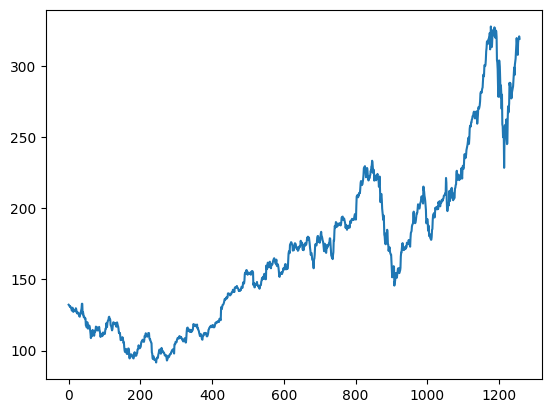

In [91]:
# plt.plot(df['close'])
plt.plot(df['high'])

In [69]:
df.shape

(1258, 14)

In [92]:
df = np.array(df['close']).reshape(-1,1) # the -1 in the reshape() function acts as a placeholder for the number of rows and allows NumPy to automatically determine the appropriate number of rows based on the number of elements in the array. 

In [107]:
training_size = int(len(df)*.65)
test_size = int(len(df)-training_size)
train , test = df[0:training_size],df[0:test_size]

In [108]:
train.shape

(817, 1)

In [ ]:
def dataset(data , time_step = 1):
    X_data , y_data = [],[]
    for i in range(len(data)-time_step-1):
        print(i)
        print(time_step)
        a = data[i:(i+time_step),0]
        print(a)
        X_data.append(a)
        y_data.append(data[i+time_step,0])
    return np.array(X_data),np.array(y_data)


dataset(train,time_step=30)

In [131]:
def dataset(data , time_step = 1):
    X_data , y_data = [],[]
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step),0]
        X_data.append(a)
        y_data.append(data[i+time_step,0])
    return np.array(X_data),np.array(y_data)

0
30
[132.045 131.78  130.28  130.535 129.96  130.12  129.36  128.65  127.8
 127.42  128.88  128.59  127.17  126.92  127.6   127.3   127.88  126.6
 127.61  127.03  128.11  127.5   126.75  124.53  125.425 126.6   126.44
 126.    125.69  122.57 ]
1
30
[131.78  130.28  130.535 129.96  130.12  129.36  128.65  127.8   127.42
 128.88  128.59  127.17  126.92  127.6   127.3   127.88  126.6   127.61
 127.03  128.11  127.5   126.75  124.53  125.425 126.6   126.44  126.
 125.69  122.57  120.07 ]
2
30
[130.28  130.535 129.96  130.12  129.36  128.65  127.8   127.42  128.88
 128.59  127.17  126.92  127.6   127.3   127.88  126.6   127.61  127.03
 128.11  127.5   126.75  124.53  125.425 126.6   126.44  126.    125.69
 122.57  120.07  123.28 ]
3
30
[130.535 129.96  130.12  129.36  128.65  127.8   127.42  128.88  128.59
 127.17  126.92  127.6   127.3   127.88  126.6   127.61  127.03  128.11
 127.5   126.75  124.53  125.425 126.6   126.44  126.    125.69  122.57
 120.07  123.28  125.66 ]
4
30
[129.96  13

(array([[132.045, 131.78 , 130.28 , ..., 126.   , 125.69 , 122.57 ],
        [131.78 , 130.28 , 130.535, ..., 125.69 , 122.57 , 120.07 ],
        [130.28 , 130.535, 129.96 , ..., 122.57 , 120.07 , 123.28 ],
        ...,
        [185.4  , 187.97 , 190.58 , ..., 208.87 , 209.75 , 210.24 ],
        [187.97 , 190.58 , 190.35 , ..., 209.75 , 210.24 , 213.32 ],
        [190.58 , 190.35 , 187.88 , ..., 210.24 , 213.32 , 217.58 ]]),
 array([120.07 , 123.28 , 125.66 , 125.61 , 126.82 , 128.51 , 129.62 ,
        132.07 , 130.75 , 125.22 , 125.16 , 124.5  , 122.77 , 123.38 ,
        122.99 , 122.37 , 121.3  , 118.44 , 114.64 , 115.4  , 115.13 ,
        115.52 , 119.72 , 113.49 , 115.24 , 115.15 , 115.96 , 117.16 ,
        116.5  , 115.01 , 112.65 , 105.76 , 103.12 , 103.74 , 109.69 ,
        112.92 , 113.29 , 112.76 , 107.72 , 112.34 , 110.37 , 109.27 ,
        112.31 , 110.15 , 112.57 , 114.21 , 115.31 , 116.28 , 116.41 ,
        113.92 , 113.45 , 115.21 , 113.4  , 114.32 , 115.   , 114.71 ,
   